# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [16]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/human_body_temperature.csv')

Populating the interactive namespace from numpy and matplotlib


In [4]:
#seaborn settings
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8,4)})

## 1. Is the distribution of body temperatures normal? 

In [5]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


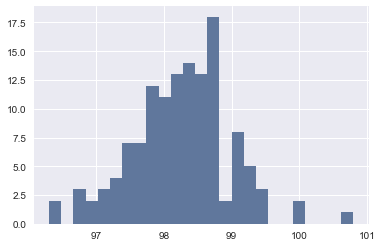

In [18]:
plt.hist(df.temperature.dropna(),bins=25)
plt.show()

C:\Users\asduser\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


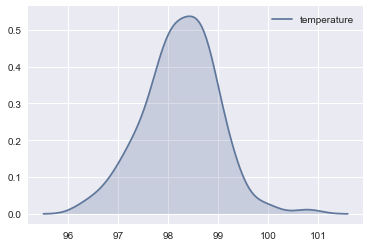

In [17]:
sns.kdeplot(df.temperature.dropna(), shade=True)


It appears to be normal, including when broken down by male and female.

In [46]:
female =df.gender == 'F'
df_female = df[female]
male =df.gender == 'M'
df_male = df[male]

C:\Users\asduser\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


(<matplotlib.axes._subplots.AxesSubplot at 0xc10cbe0>,
 <matplotlib.axes._subplots.AxesSubplot at 0xc10cbe0>)

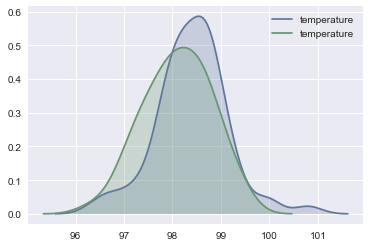

In [47]:
sns.kdeplot(df_female.temperature.dropna(), shade=True),sns.kdeplot(df_male.temperature.dropna(), shade=True)

## 2. Is the sample size large? Are the observations independent? 

In [19]:
len(df)

130

Many statistical tests want a sample larger than 30, so this meets that requirement.

Looking at the dataset information, these do not appear to be independent observations as some are from the same people over a two day period.

## 3. Is the true population mean really 98.6 degrees F?

    Would you use a one-sample or two-sample test? Why?
    In this situation, is it appropriate to use the t or z statistic?
    Now try using the other test. How is the result different? Why? 

In [48]:
from scipy import stats

In [52]:
mean_temp = mean(df.temperature)
mean_temp

98.24923076923078

In [51]:
stats.ttest_1samp(df.temperature,98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

I did the 1-sample because you are comparing the mean of the sample to a known value(mean). The t statisitic makes the most sense.

In [62]:
z = stats.zscore(df.temperature)
z

array([ 1.43870478,  0.20643202, -0.61508316,  1.30178559, -0.34124477,
        1.30178559, -0.34124477,  0.7541088 ,  0.20643202,  0.48027041,
        0.7541088 , -2.12119432, -0.06740637,  0.61718961, -0.61508316,
        0.7541088 ,  0.06951282, -0.06740637, -1.43659834,  1.57562398,
        0.06951282, -0.06740637,  0.48027041,  0.20643202, -0.61508316,
       -0.34124477, -0.61508316, -0.06740637,  0.20643202, -0.20432557,
        0.06951282, -0.88892155,  0.34335121,  0.48027041,  1.43870478,
        1.71254318,  1.16486639,  0.06951282, -0.47816396, -2.5319519 ,
        0.20643202,  0.20643202, -1.84735592, -1.43659834,  1.0279472 ,
       -0.47816396, -1.16275994, -1.16275994, -0.47816396, -1.57351753,
        0.891028  ,  0.06951282,  0.34335121,  0.48027041, -0.06740637,
        0.48027041,  0.7541088 , -0.06740637, -0.06740637, -0.88892155,
        1.16486639,  0.20643202, -0.06740637,  0.48027041,  0.61718961,
       -1.16275994, -1.16275994,  0.48027041,  0.61718961,  0.89

In [59]:
def zscore(dataset, sample):
    std = np.std(dataset)
    avg = mean(dataset)
    z = (sample - avg)/std
    return z
    

In [61]:
z = zscore(df.temperature,98.6)
z

0.48027041116080765

This corresponds to an area under the curve of about .36. The critical z-value for p = .05 is 1.96. This is obviously less, but t test is what we want, anyway. The t test tells us the probability the means are different (the question), the z score tells us how likely this new point - 98.6 - is to be near the mean of the sample.

## 4. At what temperature should we consider someone's temperature to be "abnormal"?

    Start by computing the margin of error and confidence interval. 

In [83]:
def confidence_interval(level,dataset):
    # The level has been set for 90, 95, and 99 only
    std = np.std(dataset)
    avg = mean(dataset)
    if level == 90 or level == .9:
        z = 1.645 
    if level == 95 or level == .95:
        z = 1.96
    if level == 99 or level == .99:
        z = 2.58
    if level != 90 and level!= .9 and level != 95 and level!= .95 and level != 99 and level!= .99:
        print('Error: level only set for 90, 95, or 99%')
    #margin = z*std/sqrt(len(dataset))
    margin = z*std/sqrt(1)
    interval = [avg - margin, avg + margin]
    return interval


In [81]:
confidence_interval(90,df.temperature),confidence_interval(.95,df.temperature),confidence_interval(99,df.temperature)
#This is computed with n being the number of samples

([98.143857638057185, 98.354603900404371],
 [98.123679804428193, 98.374781734033363],
 [98.083964703317179, 98.414496835144377])

In [84]:
confidence_interval(90,df.temperature),confidence_interval(.95,df.temperature),confidence_interval(99,df.temperature)
#This is computed with n = 1. I think this acutally makes more sense in describing whether an individual's temperatue is unusual

([97.047792222931989, 99.450669315529566],
 [96.817729522576897, 99.680732015884658],
 [96.364907699655774, 100.13355383880578])

## 5. Is there a significant difference between males and females in normal temperature?

    What test did you use and why?
    Write a story with your conclusion in the context of the original problem. 

In [87]:
mean(df_male.temperature),mean(df_female.temperature)

(98.1046153846154, 98.39384615384613)

In [88]:
mean(df_male.temperature) - mean(df_female.temperature)

-0.289230769230727

In [86]:
stats.ttest_ind(df_male.temperature,df_female.temperature)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

While it is commonly held that average body temperature is 98.6 degrees F, it appears that the true average is closer to 98.25. 

Further, males run cooler than females by about .3 degrees. This is a statisitcally significant difference (p = .024). 